In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn.cluster import KMeans

## Data Preprocessing

In [2]:
# load the dataset
df = pd.read_csv("C:/Users/IliaMalfa/MachineLearning_2/digit_recognizer_dataset.csv", index_col=None)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(columns=['label'])
Y = df['label']
df.shape

(42000, 785)

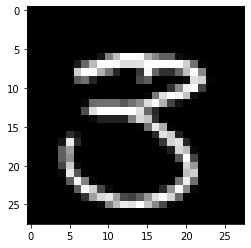

In [4]:
# plot 1 instance
digit = X.loc[7,:].values.reshape(28, 28)
pyplot.imshow(digit, cmap='gray')

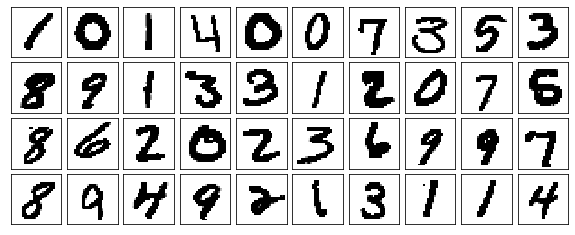

In [15]:
#plot more than 1 instances to take a look to the dataset
def plot_digits(data):
    fig, axes = pyplot.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data.iloc[i].values.reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(X_train)


In [5]:
# Standardizing the features
df_afterStandarazing = StandardScaler().fit_transform(X)

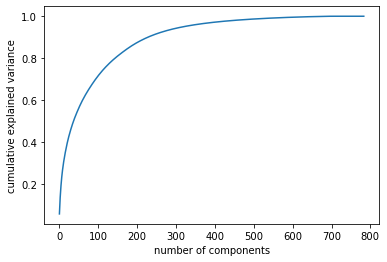

In [6]:
# PCA components and variance plot
pca = PCA().fit(df_afterStandarazing)
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.xlabel('number of components')
pyplot.ylabel('cumulative explained variance');

In [6]:
# create principal componets maintaining 95% of the variance
pca = PCA(n_components = .95)
pca.fit(df_afterStandarazing)
data = pca.transform(df_afterStandarazing)

pca.n_components
pca.n_components_

320

In [7]:
X = data.copy()
Y = df['label']
data.shape

(42000, 320)

In [8]:
# Creation of train and test data 
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.5, shuffle=False)

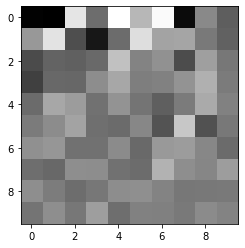

In [44]:
#View a digit after scaling and PCA
digit = data[0].reshape(10, 10)
pyplot.imshow(digit, cmap='gray')

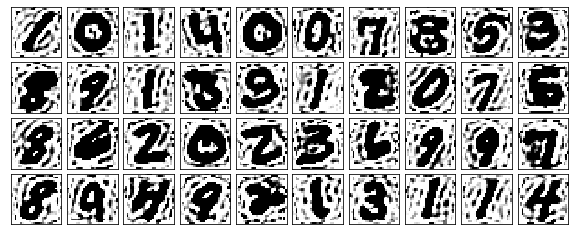

In [22]:
#plot more than 1 instances to take a look to the dataset after inverse transformation
def plot_digits(data):
    fig, axes = pyplot.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

components = pca.transform(X_train)
filtered = pca.inverse_transform(components)
plot_digits(filtered)



## Models and Settings

### Decision Tree with Grid Search


>1, train: 0.197, test: 0.192
>2, train: 0.308, test: 0.302
>3, train: 0.422, test: 0.417
>4, train: 0.528, test: 0.523
>5, train: 0.599, test: 0.593
>6, train: 0.659, test: 0.648
>7, train: 0.725, test: 0.703
>8, train: 0.774, test: 0.740
>9, train: 0.820, test: 0.769
>10, train: 0.862, test: 0.784
>11, train: 0.894, test: 0.792
>12, train: 0.922, test: 0.795
>13, train: 0.946, test: 0.795
>14, train: 0.963, test: 0.797
>15, train: 0.975, test: 0.796
>16, train: 0.984, test: 0.793
>17, train: 0.990, test: 0.791
>18, train: 0.994, test: 0.788
>19, train: 0.996, test: 0.792
>20, train: 0.997, test: 0.790


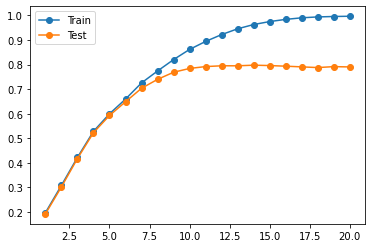

In [144]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 21)]

# evaluate a decision tree for each depth
for i in values:
       
    # As the selection measure I choose gini because it has better accuracy than entropy 
    # and the overfiting occurres in bigger depth of the tree
    
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
    
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [19]:
%%time
# 10 because after 7.5 it is overfitting
param_dict ={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),    
}

dt_grid = GridSearchCV(tree.DecisionTreeClassifier(), param_dict, cv=5, n_jobs=6, verbose=1)
dt_grid.fit(X_train, y_train)

predicted = dt_grid.predict(X_test)
print("\nClassification report for classifier %s:\n%s\n" % (dt_grid, metrics.classification_report(y_test, predicted)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done  90 out of  90 | elapsed:  2.4min finished



Classification report for classifier GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)},
             verbose=1):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2088
           1       0.94      0.93      0.93      2312
           2       0.77      0.77      0.77      2069
           3       0.72      0.77      0.74      2174
           4       0.71      0.76      0.73      1997
           5       0.75      0.65      0.69      1897
           6       0.89      0.86      0.87      2062
           7       0.85      0.78      0.81      2234
           8       0.67      0.67      0.67      2058
           9       0.67      0.70      0.68      2109

    accuracy                           0.78     21000
   macro avg       0.78      0.77      0.77     21000
weighted avg       0.78      0.78      0.78     21000





Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=9):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2088
           1       0.94      0.93      0.94      2312
           2       0.78      0.78      0.78      2069
           3       0.72      0.77      0.74      2174
           4       0.71      0.76      0.73      1997
           5       0.74      0.65      0.69      1897
           6       0.88      0.86      0.87      2062
           7       0.85      0.78      0.81      2234
           8       0.67      0.68      0.67      2058
           9       0.66      0.70      0.68      2109

    accuracy                           0.78     21000
   macro avg       0.78      0.78      0.78     21000
weighted avg       0.78      0.78      0.78     21000



Accuracy of the Algorithm:  0.7783333333333333


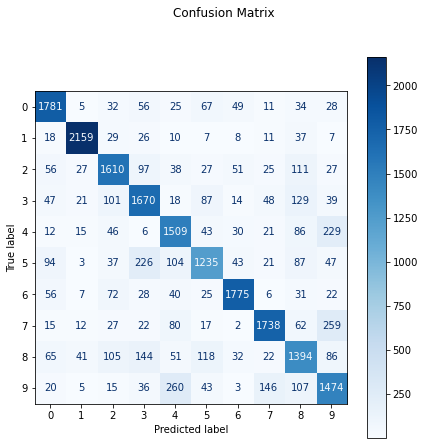

Wall time: 20.7 s


In [18]:
%%time
#Grid Search
dt = tree.DecisionTreeClassifier(**dt_grid.best_params_)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (dt, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(dt, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", dt.score(X_test, y_test))

pyplot.show()

### Gaussian Naive Bayes 


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      2088
           1       0.69      0.94      0.80      2312
           2       0.39      0.30      0.34      2069
           3       0.41      0.21      0.28      2174
           4       0.33      0.78      0.46      1997
           5       0.52      0.20      0.29      1897
           6       0.90      0.20      0.32      2062
           7       0.81      0.23      0.35      2234
           8       0.32      0.79      0.46      2058
           9       0.50      0.21      0.30      2109

    accuracy                           0.47     21000
   macro avg       0.56      0.47      0.44     21000
weighted avg       0.56      0.47      0.44     21000



Accuracy of the Algorithm:  0.4747619047619048


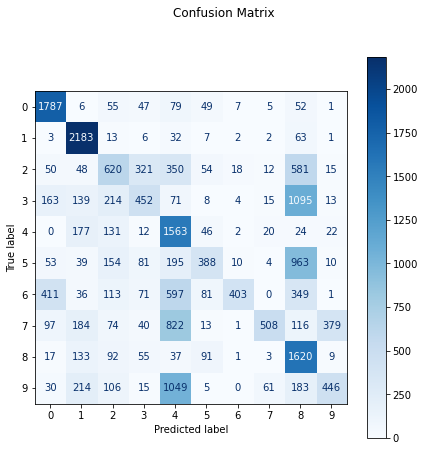

Wall time: 2.74 s


In [20]:
%%time

GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(7, 7))  

predicted = GNB_classifier.predict(X_test)
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(GNB_classifier, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(X_test, y_test))
plt.show()

### RandomForestClassifier with Grid Search and Random Search

In [9]:
#Grid Search
param_grid ={'n_estimators':[320]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=6, verbose=1)
rf_grid.fit(X_train, y_train)

predicted = rf_grid.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (rf_grid, metrics.classification_report(y_test, predicted)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:  2.9min finished



Classification report for classifier GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'n_estimators': [320]}, verbose=1):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2088
           1       0.98      0.97      0.98      2312
           2       0.90      0.93      0.91      2069
           3       0.89      0.91      0.90      2174
           4       0.92      0.93      0.92      1997
           5       0.92      0.88      0.90      1897
           6       0.94      0.96      0.95      2062
           7       0.92      0.94      0.93      2234
           8       0.93      0.88      0.90      2058
           9       0.90      0.88      0.89      2109

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000




knn grid best params :{} {'n_estimators': 320}

Classification report for classifier RandomForestClassifier(n_estimators=320):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2088
           1       0.98      0.97      0.97      2312
           2       0.90      0.92      0.91      2069
           3       0.89      0.91      0.90      2174
           4       0.92      0.93      0.92      1997
           5       0.93      0.88      0.90      1897
           6       0.94      0.96      0.95      2062
           7       0.92      0.94      0.93      2234
           8       0.93      0.87      0.90      2058
           9       0.91      0.87      0.89      2109

    accuracy                           0.93     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.93      0.93      0.93     21000



Accuracy of the Algorithm:  0.9251904761904762


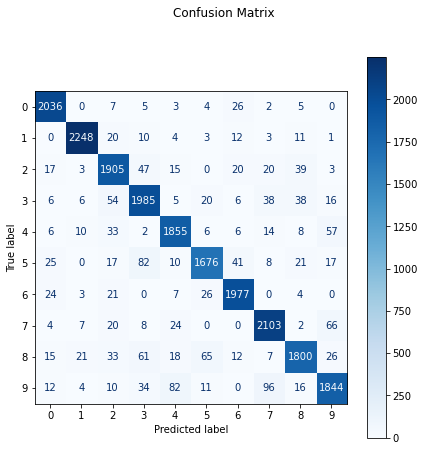

Wall time: 2min 28s


In [10]:
%%time
print("knn grid best params :{}",rf_grid.best_params_)
rf = RandomForestClassifier(**rf_grid.best_params_)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (rf, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(rf, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", rf.score(X_test, y_test))

pyplot.show()

In [33]:
%%time
#Random Search
param_dist = model_params = {
    'n_estimators':[150],
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split': uniform(0.01, 0.199)
}
rand = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=5, scoring='accuracy',n_jobs=6, n_iter=10, random_state=1)
rand.fit(X_train, y_train)
predicted = rand.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (rand, metrics.classification_report(y_test, predicted)))


Classification report for classifier RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D12CA0C130>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D12C8CD640>,
                                        'n_estimators': [150]},
                   random_state=1, scoring='accuracy'):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2088
           1       0.96      0.95      0.95      2312
           2       0.80      0.81      0.81      2069
           3       0.74      0.83      0.78      2174
           4       0.80      0.82      0.81      1997
           5       0.85      0.70      0.77      1897
           6       0.89      0.89      0.89      2062
           7       0.83      0.86      0.85      2234
           8   


Classification report for classifier RandomForestClassifier(max_features=0.26258997312314514,
                       min_samples_split=0.028375380358990766,
                       n_estimators=150):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2088
           1       0.95      0.95      0.95      2312
           2       0.80      0.81      0.80      2069
           3       0.73      0.82      0.77      2174
           4       0.81      0.82      0.82      1997
           5       0.85      0.70      0.77      1897
           6       0.89      0.89      0.89      2062
           7       0.84      0.86      0.85      2234
           8       0.81      0.75      0.78      2058
           9       0.78      0.75      0.77      2109

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000



Accuracy of the Algorithm:  0.833380952

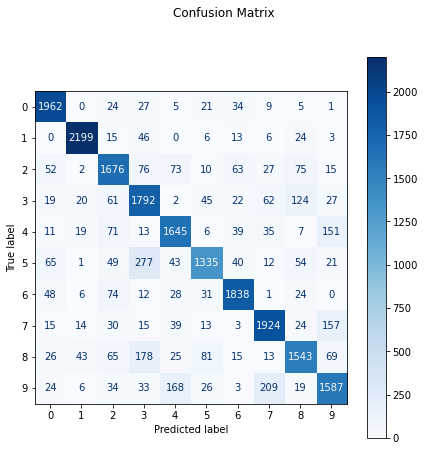

Wall time: 2min 18s


In [34]:
%%time
rf = RandomForestClassifier(**rand.best_params_)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (rf, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(rf, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", rf.score(X_test, y_test))

pyplot.show()

### KNeighborsClassifier with Grid Search and Random Search

In [36]:
%%time
#Grid Search
grid_params ={'n_neighbors':[3,5], 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=6, verbose=1)
knn_grid.fit(X_train, y_train)

predicted = knn_grid.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (knn_grid, metrics.classification_report(y_test, predicted)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:  7.5min finished



Classification report for classifier GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             verbose=1):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2088
           1       0.95      0.99      0.97      2312
           2       0.95      0.92      0.93      2069
           3       0.92      0.93      0.92      2174
           4       0.94      0.92      0.93      1997
           5       0.92      0.91      0.91      1897
           6       0.95      0.97      0.96      2062
           7       0.92      0.94      0.93      2234
           8       0.95      0.88      0.91      2058
           9       0.89      0.91      0.90      2109

    accuracy                           0.94     21000
   macro avg       0.94      0.93      0.93     210


Classification report for classifier KNeighborsClassifier(metric='euclidean', weights='distance'):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2088
           1       0.95      0.99      0.97      2312
           2       0.95      0.92      0.93      2069
           3       0.92      0.93      0.92      2174
           4       0.94      0.92      0.93      1997
           5       0.92      0.91      0.91      1897
           6       0.95      0.97      0.96      2062
           7       0.92      0.94      0.93      2234
           8       0.95      0.88      0.91      2058
           9       0.89      0.91      0.90      2109

    accuracy                           0.94     21000
   macro avg       0.94      0.93      0.93     21000
weighted avg       0.94      0.94      0.94     21000



Accuracy of the Algorithm:  0.9352380952380952


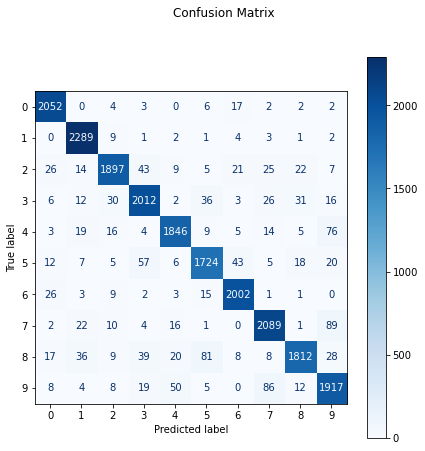

Wall time: 11min 50s


In [38]:
%%time
print("knn grid best params :{}",knn_grid.best_params_)
knn = KNeighborsClassifier(**knn_grid.best_params_)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (knn, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(knn, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", knn.score(X_test, y_test))

pyplot.show()

In [52]:
%%time
#Random Search
dist_params ={'n_neighbors':[3,5], 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}
rand_knn = RandomizedSearchCV(KNeighborsClassifier(), dist_params, cv=5, scoring='accuracy',n_jobs=6, n_iter=8, random_state=1)
rand_knn.fit(X_train, y_train)

predicted = rand.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (rand_knn, metrics.classification_report(y_test, predicted)))


Classification report for classifier RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=8, n_jobs=6,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, scoring='accuracy'):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2088
           1       0.96      0.95      0.95      2312
           2       0.80      0.81      0.81      2069
           3       0.74      0.83      0.78      2174
           4       0.80      0.82      0.81      1997
           5       0.85      0.70      0.77      1897
           6       0.89      0.89      0.89      2062
           7       0.83      0.86      0.85      2234
           8       0.81      0.76      0.79      2058
           9       0.78      0.73      0.75      2109

    accuracy 


Classification report for classifier KNeighborsClassifier(metric='euclidean', weights='distance'):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2088
           1       0.95      0.99      0.97      2312
           2       0.95      0.92      0.93      2069
           3       0.92      0.93      0.92      2174
           4       0.94      0.92      0.93      1997
           5       0.92      0.91      0.91      1897
           6       0.95      0.97      0.96      2062
           7       0.92      0.94      0.93      2234
           8       0.95      0.88      0.91      2058
           9       0.89      0.91      0.90      2109

    accuracy                           0.94     21000
   macro avg       0.94      0.93      0.93     21000
weighted avg       0.94      0.94      0.94     21000



Accuracy of the Algorithm:  0.9352380952380952


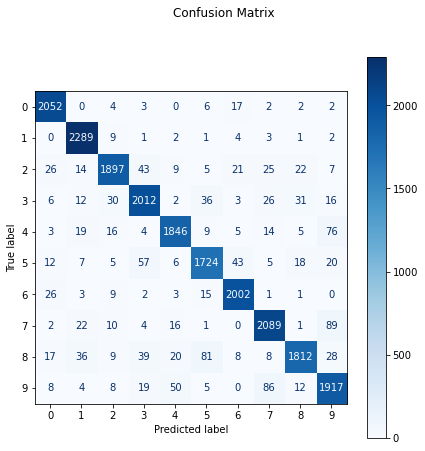

Wall time: 11min 58s


In [55]:
%%time
knn = KNeighborsClassifier(**rand_knn.best_params_)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (knn, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(knn, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", knn.score(X_test, y_test))

pyplot.show()

### LogisticRegressionClassifier with Grid Search and Random Search

In [47]:
%%time
#Grid Search
grid_params = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2', 'l1'],
    'n_jobs': [-1]
}
lr_grid = GridSearchCV(LogisticRegression(), grid_params, cv=5, n_jobs=6, verbose=1)
lr_grid.fit(X_train, y_train)

predicted = lr_grid.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (lr_grid, metrics.classification_report(y_test, predicted)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  61 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:   20.4s finished



Classification report for classifier GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=6,
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                               1.0],
                         'n_jobs': [-1], 'penalty': ['l2', 'l1']},
             verbose=1):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2088
           1       0.92      0.98      0.95      2312
           2       0.91      0.88      0.90      2069
           3       0.90      0.87      0.88      2174
           4       0.90      0.92      0.91      1997
           5       0.87      0.86      0.87      1897
           6       0.93      0.95      0.94      2062
           7       0.92      0.93      0.93      2234
           8       0.88      0.86      0.87      2058
           9       0.88      0.88      0.88      2109

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91 

lr_grid best params :{} {'C': 0.001, 'n_jobs': -1, 'penalty': 'l2'}

Classification report for classifier LogisticRegression(C=0.001, n_jobs=-1):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2088
           1       0.92      0.98      0.95      2312
           2       0.91      0.88      0.90      2069
           3       0.90      0.87      0.88      2174
           4       0.90      0.92      0.91      1997
           5       0.87      0.86      0.87      1897
           6       0.93      0.95      0.94      2062
           7       0.92      0.93      0.93      2234
           8       0.88      0.86      0.87      2058
           9       0.88      0.88      0.88      2109

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



Accuracy of the Algorithm:  0.9087142857142857


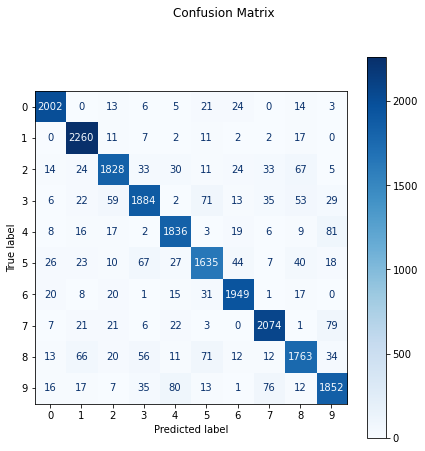

Wall time: 4.07 s


In [48]:
%%time
print("lr_grid best params :{}",lr_grid.best_params_)
lr = LogisticRegression(**lr_grid.best_params_)
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (lr, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", lr.score(X_test, y_test))

pyplot.show()

In [49]:
%%time
#Random Search

grid_params = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
lr_rand = RandomizedSearchCV(LogisticRegression(), grid_params, cv=5, n_jobs=6, verbose=1)
lr_rand.fit(X_train, y_train)

predicted = lr_rand.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (lr_rand, metrics.classification_report(y_test, predicted)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\IliaMalfa\anaconda3\envs\ML2\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:   20.6s finished



Classification report for classifier RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=6,
                   param_distributions={'C': [1e-07, 1e-06, 1e-05, 0.0001,
                                              0.001, 0.01, 0.1, 1.0],
                                        'n_jobs': [-1], 'penalty': ['l2']},
                   verbose=1):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2088
           1       0.92      0.98      0.95      2312
           2       0.91      0.88      0.90      2069
           3       0.90      0.87      0.88      2174
           4       0.90      0.92      0.91      1997
           5       0.87      0.86      0.87      1897
           6       0.93      0.95      0.94      2062
           7       0.92      0.93      0.93      2234
           8       0.88      0.86      0.87      2058
           9       0.88      0.88      0.88      2109

    accuracy                           0.91    

lr_rand best params :{} {'penalty': 'l2', 'n_jobs': -1, 'C': 0.001}

Classification report for classifier LogisticRegression(C=0.001, n_jobs=-1):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2088
           1       0.92      0.98      0.95      2312
           2       0.91      0.88      0.90      2069
           3       0.90      0.87      0.88      2174
           4       0.90      0.92      0.91      1997
           5       0.87      0.86      0.87      1897
           6       0.93      0.95      0.94      2062
           7       0.92      0.93      0.93      2234
           8       0.88      0.86      0.87      2058
           9       0.88      0.88      0.88      2109

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



Accuracy of the Algorithm:  0.9087142857142857


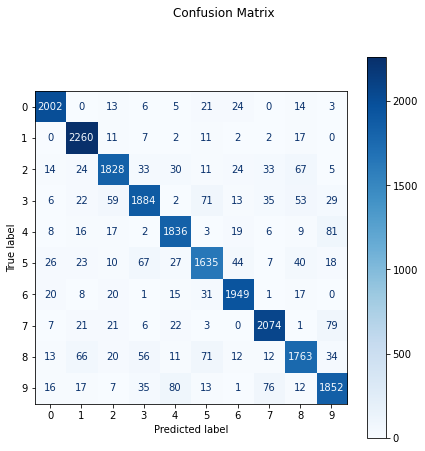

Wall time: 3.94 s


In [50]:
%%time
print("lr_rand best params :{}",lr_rand.best_params_)
lr = LogisticRegression(**lr_rand.best_params_)
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (lr, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", lr.score(X_test, y_test))

pyplot.show()

### SVM with Grid Search and Random Search

In [10]:
%%time
#Grid Search
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear']}]
svm_grid = GridSearchCV(svm.SVC(), tuned_parameters, cv=5, n_jobs=6, verbose=1)
svm_grid.fit(X_train, y_train)

predicted = svm_grid.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (svm_grid, metrics.classification_report(y_test, predicted)))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  35 out of  35 | elapsed:  5.9min finished



Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=6,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'kernel': ['linear']}],
             verbose=1):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2088
           1       0.98      0.99      0.98      2312
           2       0.92      0.97      0.94      2069
           3       0.96      0.95      0.96      2174
           4       0.96      0.96      0.96      1997
           5       0.95      0.95      0.95      1897
           6       0.97      0.97      0.97      2062
           7       0.96      0.97      0.97      2234
           8       0.97      0.94      0.96      2058
           9       0.96      0.94      0.95      2109

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0

svm_rand best params :{} {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Classification report for classifier SVC(C=10, gamma=0.001):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2088
           1       0.98      0.99      0.98      2312
           2       0.92      0.97      0.94      2069
           3       0.96      0.95      0.96      2174
           4       0.96      0.96      0.96      1997
           5       0.95      0.95      0.95      1897
           6       0.97      0.97      0.97      2062
           7       0.96      0.97      0.97      2234
           8       0.97      0.94      0.96      2058
           9       0.96      0.94      0.95      2109

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



Accuracy of the Algorithm:  0.9621904761904762


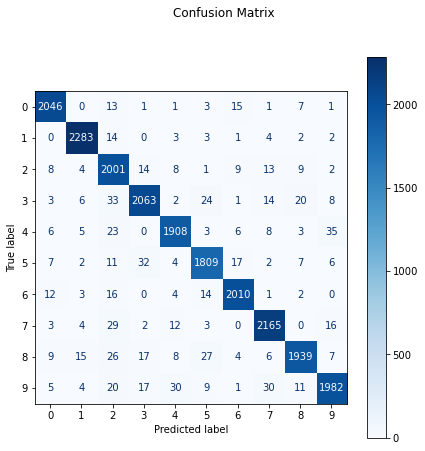

Wall time: 2min 45s


In [12]:
%%time
print("svm_grid best params :{}",svm_grid.best_params_)
svm = svm.SVC(**svm_grid.best_params_)
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (svm, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(svm, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", svm.score(X_test, y_test))

pyplot.show()

In [18]:
%%time
#Random Search
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear']}]
svm_rand = RandomizedSearchCV(svm.SVC(), tuned_parameters, cv=5, n_jobs=6, verbose=1)
svm_rand.fit(X_train, y_train)

predicted = svm_rand.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (svm_rand, metrics.classification_report(y_test, predicted)))

C:\Users\IliaMalfa\anaconda3\envs\ML2\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=6)]: Done  35 out of  35 | elapsed:  6.5min finished



Classification report for classifier RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=6,
                   param_distributions=[{'C': [1, 10, 100],
                                         'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']},
                                        {'kernel': ['linear']}],
                   verbose=1):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2088
           1       0.98      0.99      0.98      2312
           2       0.92      0.97      0.94      2069
           3       0.96      0.95      0.96      2174
           4       0.96      0.96      0.96      1997
           5       0.95      0.95      0.95      1897
           6       0.97      0.97      0.97      2062
           7       0.96      0.97      0.97      2234
           8       0.97      0.94      0.96      2058
           9       0.96      0.94      0.95      2109

    accuracy                  

svm_rand best params :{} {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

Classification report for classifier SVC(C=10, gamma=0.001):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2088
           1       0.98      0.99      0.98      2312
           2       0.92      0.97      0.94      2069
           3       0.96      0.95      0.96      2174
           4       0.96      0.96      0.96      1997
           5       0.95      0.95      0.95      1897
           6       0.97      0.97      0.97      2062
           7       0.96      0.97      0.97      2234
           8       0.97      0.94      0.96      2058
           9       0.96      0.94      0.95      2109

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



Accuracy of the Algorithm:  0.9621904761904762


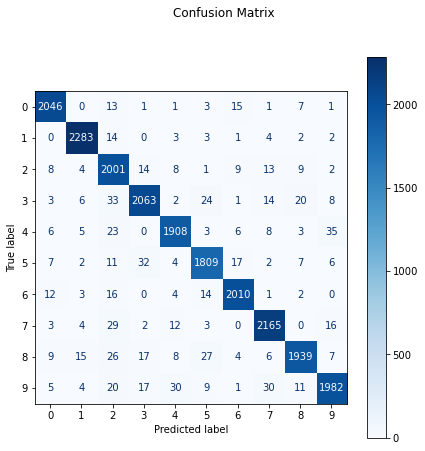

Wall time: 3min 3s


In [20]:
%%time
print("svm_rand best params :{}",svm_rand.best_params_)
svm = svm.SVC(**svm_rand.best_params_)
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (svm, metrics.classification_report(y_test, predicted)))
fig, ax = plt.subplots(figsize=(7, 7))  
disp = metrics.plot_confusion_matrix(svm, X_test, y_test, cmap= plt.cm.Blues, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", svm.score(X_test, y_test))

pyplot.show()

### AdaBoost with Grid Search

In [51]:
%%time
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, cv=5, n_jobs=6, verbose=1)
grid_search_ABC.fit(X_train, y_train)

predicted = grid_search_ABC.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (grid_search_ABC, metrics.classification_report(y_test, predicted)))
print("\nAccuracy of the Algorithm: ", grid_search_ABC.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:    7.0s finished



Classification report for classifier GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_features='auto',
                                                                                random_state=11)),
             n_jobs=6,
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2]},
             verbose=1):
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      2088
           1       0.89      0.92      0.90      2312
           2       0.55      0.54      0.54      2069
           3       0.55      0.54      0.55      2174
           4       0.57      0.58      0.58      1997
           5       0.57      0.57      0.57      1897
           6 